In [2]:
import pickle as pkl
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import json

In [3]:
hr_to_ev = 27.2114

In [4]:
PBE0_results = json.load(open("PBE0_results.json"))

FileNotFoundError: [Errno 2] No such file or directory: 'PBE0_results.json'

In [9]:
distances = []
dimer_energies = []
monomer_energies = []
dipole_interaction_energies = []
charge_interaction_energies = []
dipole_couplings = []
charge_couplings = []

angles = []

results = PBE0_results["PBE0"]

for frame_key, frame in results.items():
    for dimer_key, dimer in results[frame_key].items():
        
        dimer_from_dipole1 = min(dimer["dimer_energies"], key=lambda x:abs(x-dimer["dipole_exciton_energies"][0]))
        dimer_from_dipole2 = min(dimer["dimer_energies"], key=lambda x:abs(x-dimer["dipole_exciton_energies"][1]))
                
        dimer_energies.append(dimer_from_dipole1)
        dipole_interaction_energies.append(dimer["dipole_exciton_energies"][0])
        distances.append(dimer["distance"])
        dipole_couplings.append(dimer["dipole_coupling"])
        angles.append(dimer["angle"])
        
        dimer_energies.append(dimer_from_dipole2)
        dipole_interaction_energies.append(dimer["dipole_exciton_energies"][1])
        distances.append(dimer["distance"])
        dipole_couplings.append(dimer["dipole_coupling"])
        angles.append(dimer["angle"])
        
        monomer_energies.append(dimer["monomer_energies"][0])
        monomer_energies.append(dimer["monomer_energies"][1])


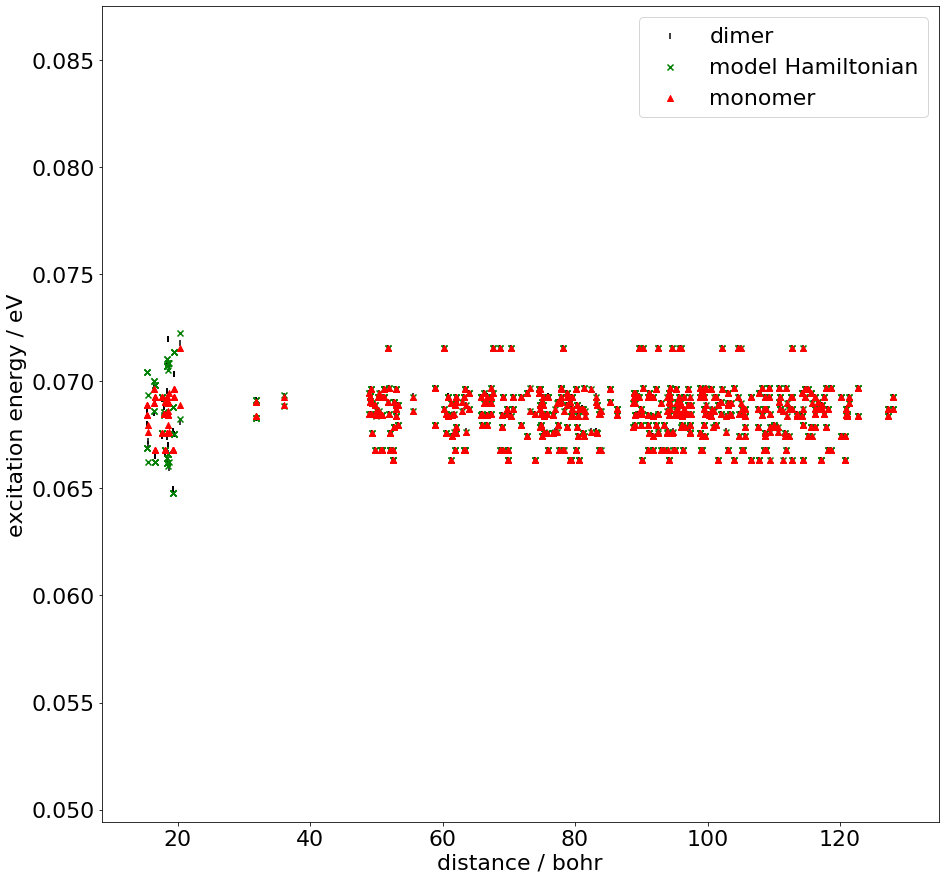

In [23]:
matplotlib.rcParams.update({'font.size': 22})
fig, ax = plt.subplots()

a=1
ax.scatter(distances, dimer_energies, marker='|', color='black', alpha=a, label='dimer')
ax.scatter(distances, dipole_interaction_energies, marker='x', color='green', alpha=a, label='model Hamiltonian')
ax.scatter(distances, monomer_energies, marker='^', color='red', alpha=a, label='monomer')

ax.legend()
#ax.set_xlim(15, 21.0)
ax.set_xlabel("distance / bohr")
ax.set_ylabel("excitation energy / eV")

fig.set_size_inches(15,15)


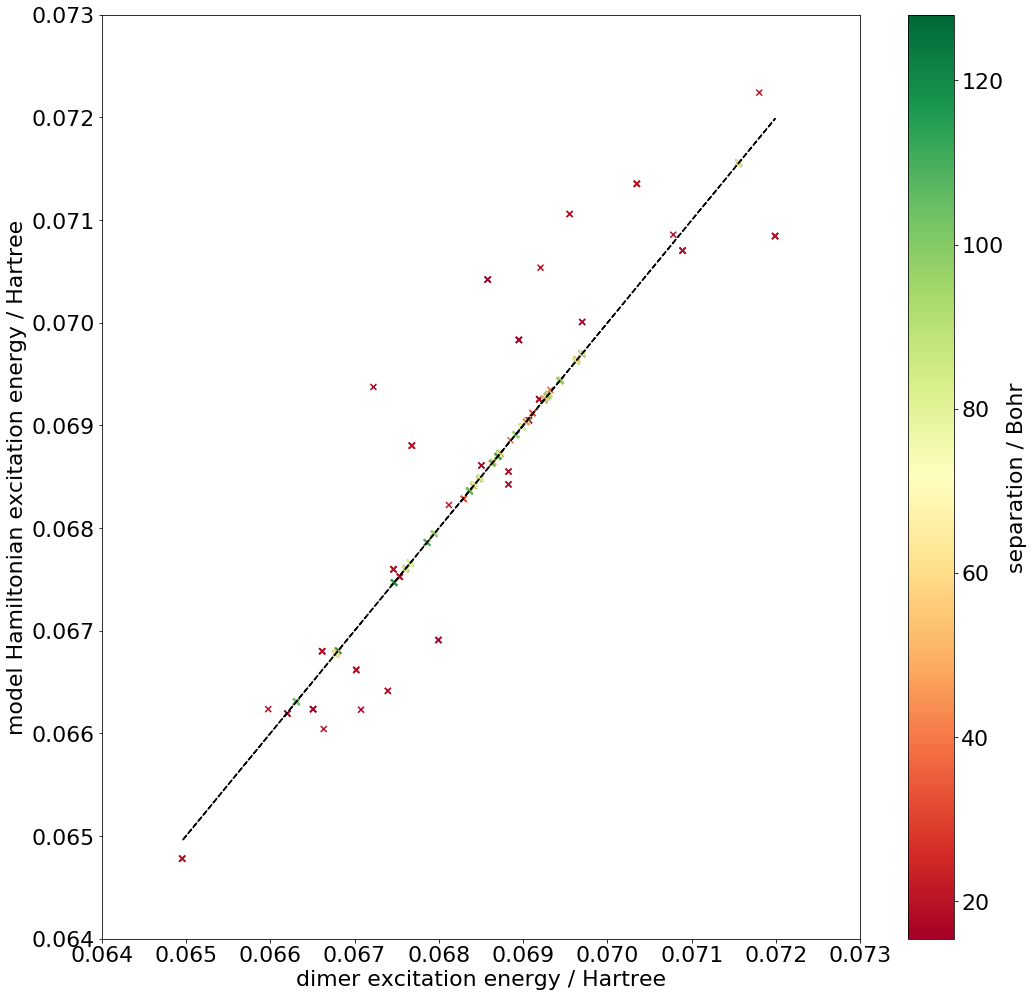

In [15]:
fig, ax = plt.subplots()

a=1
cax = ax.scatter(dimer_energies, dipole_interaction_energies, c=distances, cmap='RdYlGn', marker='x', alpha=a)
#ax.scatter(distances, orient_energies-dimer_energies, marker='^', color='red', alpha=a, label='dipole interaction orientated along Na-Nc axis')
#ax.scatter(distances, charges_energies-dimer_energies, marker='|', color='black', alpha=a, label='transition charge interaction')

upper_lim = 0.073
lower_lim = 0.064

#ax.legend()
ax.set_xlim(lower_lim, upper_lim)
ax.set_ylim(lower_lim, upper_lim)
ax.plot(dimer_energies, dimer_energies, color='black', linestyle='--')
ax.set_xlabel("dimer excitation energy / Hartree")
ax.set_ylabel("model Hamiltonian excitation energy / Hartree")

#ax.hlines(monomer_energies, xmin=lower_lim, xmax=upper_lim, linestyles="--")

cbar = fig.colorbar(cax, ax=ax)
cbar.set_label("separation / Bohr")
fig.set_size_inches(17,17)


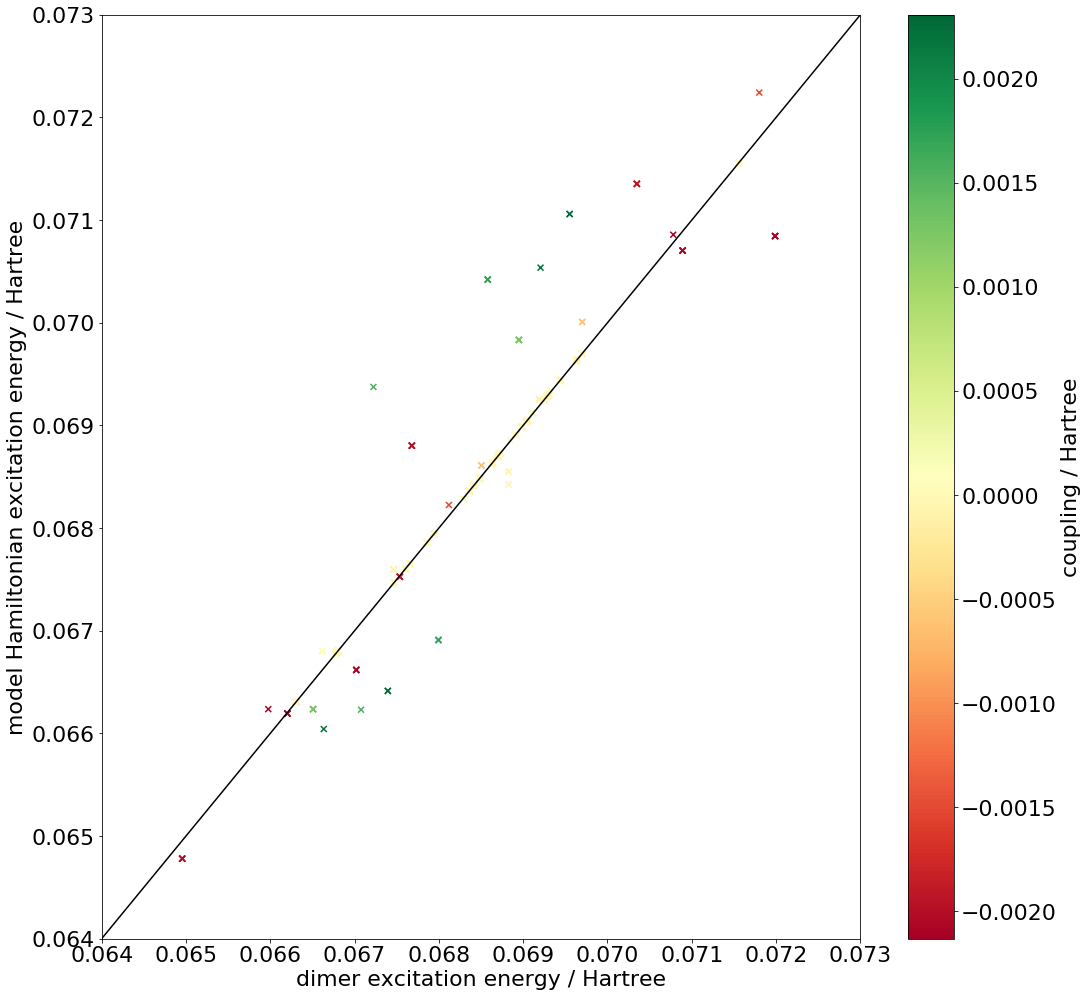

In [19]:
fig, ax = plt.subplots()

a=1
cax = ax.scatter(dimer_energies, dipole_interaction_energies, c=dipole_couplings, cmap='RdYlGn', marker='x', alpha=a)
#ax.scatter(distances, orient_energies-dimer_energies, marker='^', color='red', alpha=a, label='dipole interaction orientated along Na-Nc axis')
#ax.scatter(distances, charges_energies-dimer_energies, marker='|', color='black', alpha=a, label='transition charge interaction')

upper_lim = 0.073
lower_lim = 0.064

#ax.legend()
ax.set_xlim(lower_lim, upper_lim)
ax.set_ylim(lower_lim, upper_lim)
ax.plot(ax.get_xlim(), ax.get_ylim(), color='black')
ax.set_xlabel("dimer excitation energy / Hartree")
ax.set_ylabel("model Hamiltonian excitation energy / Hartree")

cbar = fig.colorbar(cax, ax=ax)
cbar.set_label("coupling / Hartree")
fig.set_size_inches(17,17)


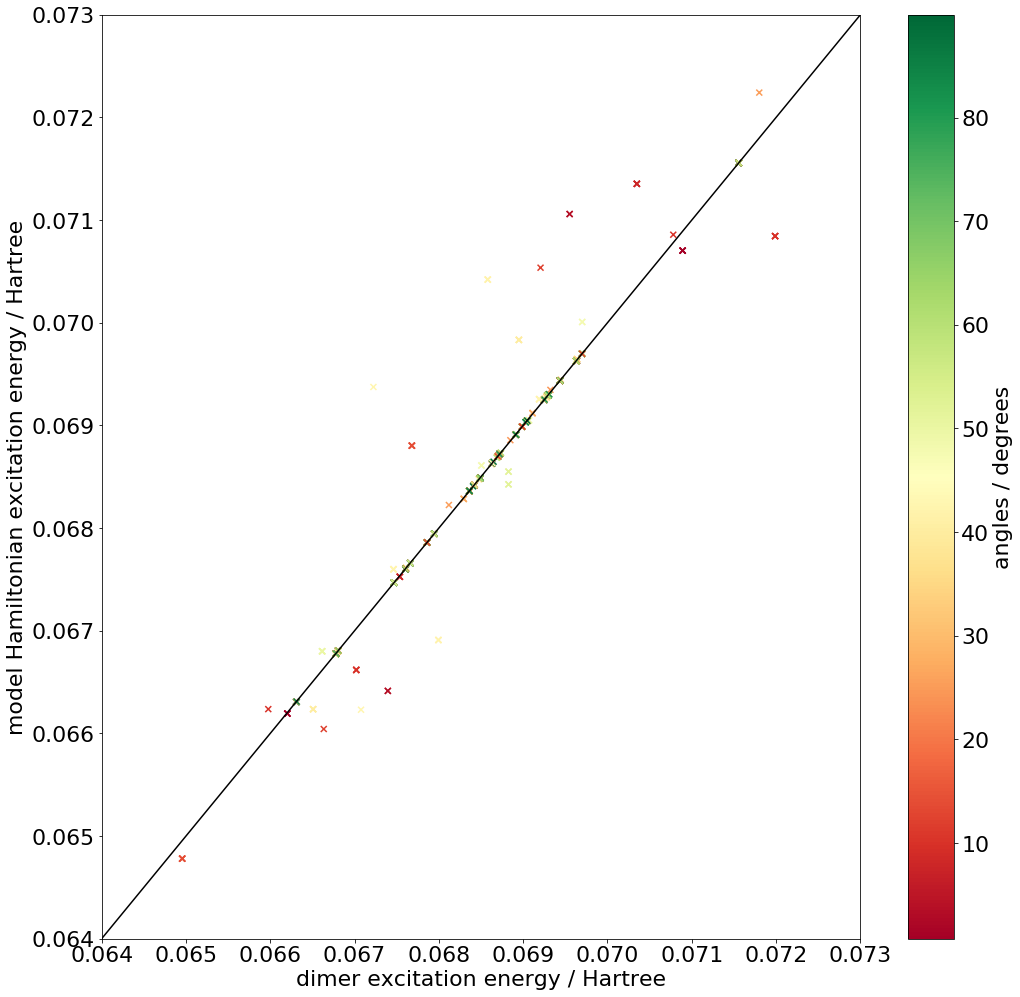

In [20]:
fig, ax = plt.subplots()

a=1
cax = ax.scatter(dimer_energies, dipole_interaction_energies, c=angles, cmap='RdYlGn', marker='x', alpha=a)
#ax.scatter(distances, orient_energies-dimer_energies, marker='^', color='red', alpha=a, label='dipole interaction orientated along Na-Nc axis')
#ax.scatter(distances, charges_energies-dimer_energies, marker='|', color='black', alpha=a, label='transition charge interaction')

upper_lim = 0.073
lower_lim = 0.064

#ax.legend()
ax.set_xlim(lower_lim, upper_lim)
ax.set_ylim(lower_lim, upper_lim)
ax.plot(ax.get_xlim(), ax.get_ylim(), color='black')
ax.set_xlabel("dimer excitation energy / Hartree")
ax.set_ylabel("model Hamiltonian excitation energy / Hartree")

cbar = fig.colorbar(cax, ax=ax)
cbar.set_label("angles / degrees")
fig.set_size_inches(17,17)

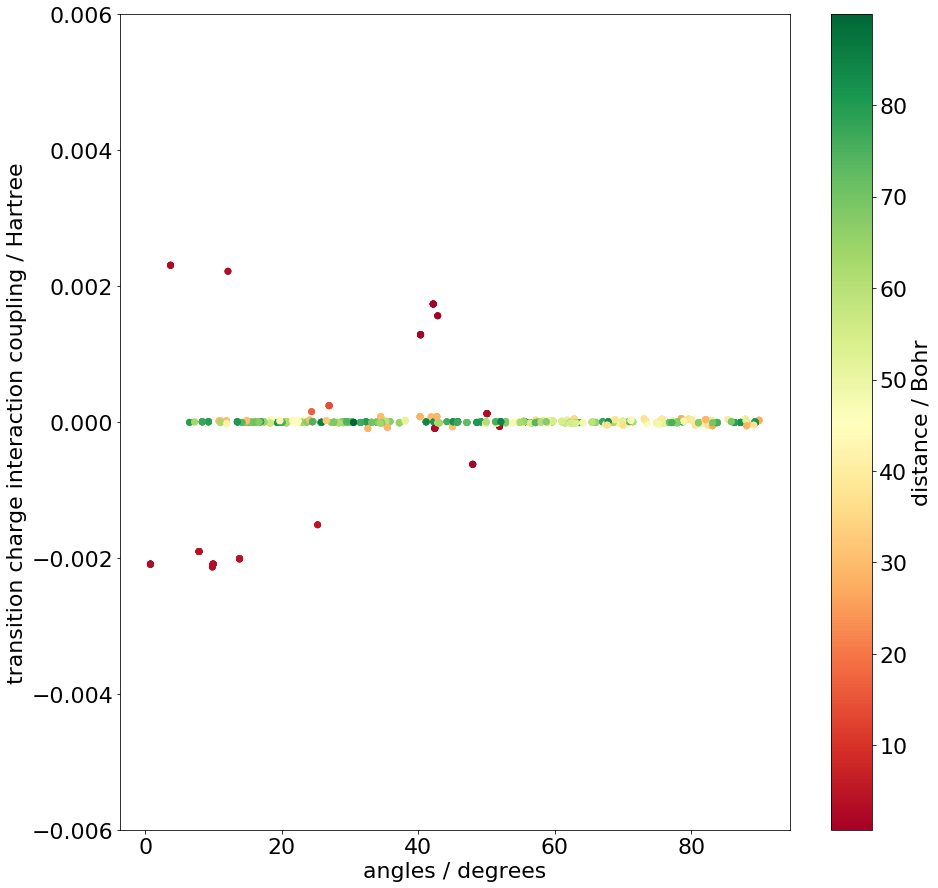

In [21]:
fig, ax = plt.subplots()

ax.scatter(angles, dipole_couplings, label="dipole", c=distances, cmap='RdYlGn')
#ax.scatter(angles, charge_couplings, label="charges", color='red', c=distances, cmap='RdYlGn')
#ax.legend()
ax.set_ylim(-0.006, 0.006)
ax.set_xlabel("angles / degrees")
ax.set_ylabel("transition charge interaction coupling / Hartree")

cbar = fig.colorbar(cax, ax=ax)
cbar.set_label("distance / Bohr")
fig.set_size_inches(15,15)